## Predicting the POI category from the name of it 

In [1]:
import os 
os.chdir('D:\MSC\Data')
os.getcwd()

'D:\\MSC\\Data'

In [2]:
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt
from nltk.tokenize import regexp_tokenize
import re

In [3]:
places = pd.read_csv('places\\places for dss\\thi_jpura_dehi_cleaned_places.csv',index_col = 0)

In [4]:
places.shape

(29261, 12)

In [5]:
places.head()

,name,place_id,lat,lng,types,vicinity,no_of_ratings,avg_rating,geometry,type_1,dual_1,dual_2
0,Khairiya Muslim Girl's Grand College,ChIJS6PgLw9Z4joRADXcRN0MYh0,6.929464,79.868975,"['school', 'point_of_interest', 'establishment']","219 Sri Vajiragnana Mawatha, Colombo",27.0,4.4,POINT (79.8689747 6.929464200000002),school,NaN,NaN
1,My abacus centre,ChIJsVF2JQ9Z4joRIe5Tj4_xfJs,6.929437,79.868935,"['school', 'point_of_interest', 'establishment']","Sri Vajiragnana Mawatha, Colombo",NaN,NaN,POINT (79.8689347 6.929437099999999),school,NaN,NaN
2,Sea and Air Shipping Colombo,ChIJf02bZ5pZ4joRFjvKh9SKx78,6.929457,79.868527,"['point_of_interest', 'establishment']","D 1/3,, Sri Vagiraghana Mawatha I, Colombo 10",NaN,NaN,POINT (79.868527 6.929457),establishment,NaN,NaN
4,Asian Pharmacy,ChIJTf5fsQhZ4joRRc4Z_cyWnFA,6.929506,79.869235,"['pharmacy', 'health', 'point_of_interest', 's...","228 Sri Vajiragnana Mawatha, Colombo",NaN,NaN,POINT (79.86923519999999 6.929506300000001),pharmacy,NaN,NaN
5,LAUGFS SuperMart,ChIJ4TBnybtZ4joRICKdUnmmLfw,6.929335,79.869333,"['supermarket', 'grocery_or_supermarket', 'foo...","No.228 Sri Vajiragnana Mawatha, Colombo",2.0,5.0,POINT (79.8693329 6.929334599999998),supermarket,NaN,NaN


In [5]:
places.columns

Index(['name', 'place_id', 'lat', 'lng', 'types', 'vicinity', 'no_of_ratings',
       'avg_rating', 'geometry', 'type_1', 'dual_1', 'dual_2'],
      dtype='object')

<div class="alert alert-block alert-warning">
<b> Text Cleaning :</b> 
</div>

In [5]:
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [6]:
## tokenize and lower the poi names
def name_clean(name):
    # Define a regex pattern to tokenize: pattern1
    pattern1 = r"\w+"
    # Use the pattern to tokenize
    words = regexp_tokenize(name, pattern1)
#     words = re.findall('[A-Za-z]' , words)
    l_words = [t.lower() for t in words if t.isalpha() and isEnglish(t) and len(t)>1]
    length = len(l_words)
    if length == 0: 
        l_words = ['NA']
    return ' '.join(l_words)

In [7]:
places['clean_name'] = places['name'].apply(name_clean)

In [9]:
# unreliable_names_indexes = []
# for idx,row in places.iterrows():
#     letters =  re.findall('[A-Za-z]' ,  row['name'])
#     if len(letters)<3:
#         unreliable_names_indexes.append(idx)
# named_places = places.drop(unreliable_names_indexes)
# named_places.shape

In [8]:
named_places = places[places['clean_name']!='NA'] ## remove the POIS without accceptable names 

In [9]:
named_places.shape

(28949, 13)

In [10]:
## remove the dual type of POIs
named_places = named_places.drop(named_places[named_places['type_1']=='dual'].index)
named_places.shape

(28928, 13)

<div class="alert alert-block alert-warning">
<b> Add features for word count : do not use now for this analysis </b> 
</div>

<div class="alert alert-block alert-warning">
<b> Category assignment  :</b> 
</div>

In [11]:
categories = pd.read_csv('places\categories\categories_summary_of_places.csv',index_col=0)

In [12]:
## small function to remove the nan values in the above cateogry arrays
def arraywithoutnan(nanarray):
    newarray = []
    for i in range(len(nanarray)):
        if str(nanarray[i]) != 'nan':
            newarray.append(nanarray[i])
        if str(nanarray[i]) == 'nan':
            break
    return newarray 

In [13]:
# create arrays for each category type removing the nan values 
shopping = arraywithoutnan(categories.loc['shopping ',:].values)
education = arraywithoutnan(categories.loc['Education ',:].values)
medical = arraywithoutnan(categories.loc['medical',:].values)
recreational = arraywithoutnan(categories.loc['recreational ',:].values)
personal = arraywithoutnan(categories.loc['personal ',:].values)
transit = arraywithoutnan(categories.loc['transit ',:].values)
dining = arraywithoutnan(categories.loc['dining ',:].values)
home = arraywithoutnan(categories.loc['home ',:].values)

In [14]:
categories_list = [shopping,education,medical,recreational,personal,transit,dining,home]

In [15]:
## function to provide the category given the category type of a POI, 
def catassign(category_type):
    if category_type == 'work':
        categry = 'work'
    elif category_type in shopping:
        categry = 'shopping'
    elif category_type in education: 
        categry = 'education'
    elif category_type in medical: 
        categry = 'medical'
    elif category_type in recreational:
        categry = 'recreational'
    elif category_type in personal:
        categry = 'personal'
    elif category_type in transit:
        categry = 'transit'
    elif category_type in dining: 
        categry = 'dining'
    elif category_type in home: 
        categry = 'home'
    else:
        categry = 'unknown'
    return categry 

In [16]:
for idx,row in named_places.iterrows():
     named_places.loc[idx,'purpose'] = catassign(row['type_1'])

In [17]:
named_places[(named_places['purpose'] == 'unknown') & (named_places['type_1'] != 'establishment')] ## this means alll the unkonwn catgories are relate to the establishment category type

,name,place_id,lat,lng,types,vicinity,no_of_ratings,avg_rating,geometry,type_1,dual_1,dual_2,clean_name,purpose


<div class="alert alert-block alert-warning">
<b> ML Model Creation  :</b> 
</div>

In [18]:
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [20]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [21]:
## dimension reduction techniques 
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, KernelPCA
from sklearn.feature_selection import VarianceThreshold

In [22]:
places_data = named_places[named_places['purpose'] != 'unknown'] # extract the labeled dataset

In [23]:
## select the categories to be predicted 

In [24]:
places_data['purpose'].unique()

array(['education', 'medical', 'shopping', 'personal', 'dining',
       'recreational', 'transit', 'home'], dtype=object)

In [25]:
places_data.shape

(15553, 14)

In [27]:
places_data['purpose'].value_counts()

personal        5717
shopping        4344
dining          2396
medical         1289
education       1195
transit          349
recreational     252
home              11
Name: purpose, dtype: int64

<AxesSubplot:>

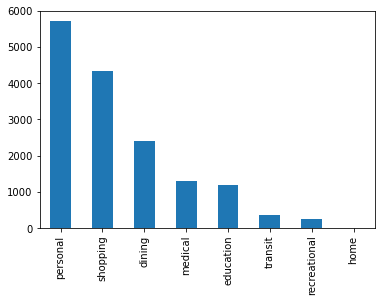

In [28]:
places_data['purpose'].value_counts().plot(kind='bar')

In [26]:
CategoriesToSelect = ['education','medical','shopping', 'personal', 'dining', 'transit'] # select the required categories for the ML Model 
places_data = places_data[places_data['purpose'].isin(CategoriesToSelect)]

In [27]:
places_data.shape

(15290, 14)

In [28]:
places_data = places_data[['clean_name','purpose']]

<AxesSubplot:>

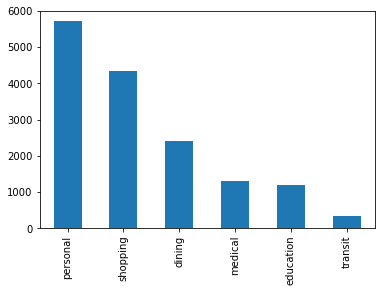

In [31]:
places_data['purpose'].value_counts().plot(kind='bar')

In [29]:
places_data = places_data.reset_index(drop=True)

In [30]:
vectorizer =  CountVectorizer()

bow_matrix = vectorizer.fit_transform(places_data['clean_name'])

word_features = vectorizer.get_feature_names()

In [31]:
bow_table = pd.DataFrame(bow_matrix.toarray() , columns = word_features)

In [33]:
bow_table.shape

(15290, 11276)

In [86]:
## trying different feature extraction techniques 

tsvd = TruncatedSVD(n_components=10)
reduced_features = tsvd.fit_transform(bow_matrix)

pca = PCA(n_components=10, whiten=True)
reduced_features = pca.fit_transform(bow_table)

In [ ]:
kpca = KernelPCA(n_components=0.99, whiten=True)
reducted_features = kpca.fit_transform(bow_table)

lda = LinearDiscriminantAnalysis(n_components=1)
reducted_features = lda.fit(bow_table, places_data['purpose']).transform(bow_table)

nmf = NMF(n_components=1000, random_state=1)
reduced_features = nmf.fit_transform(bow_matrix)

In [ ]:
## trying different feature selection techniques

thresholder = VarianceThreshold(threshold=(.75 * (1 - .75)))
reduced_features = thresholder.fit_transform(bow_matrix)

In [74]:
reduced_features

<15290x11276 sparse matrix of type '<class 'numpy.int64'>'
	with 45532 stored elements in Compressed Sparse Row format>

In [61]:
reduced_names = pd.DataFrame(reduced_features, columns = np.arange(1,11,1))

In [62]:
reduced_names.shape

(15290, 10)

In [34]:
bow_table.drop([col for col, val in bow_table.sum().iteritems() if val == 1], axis=1, inplace=True)

In [65]:
bow_table

,aa,aaa,aadare,aalindaya,aaliyah,aari,aashkii,aaysha,abacus,abans,...,zen,zenith,zero,zion,zodiac,zone,zoo,zoysa,zuls,zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
X_train,X_test,y_train,y_test = train_test_split(bow_table,places_data['purpose'],test_size=0.2, random_state=32)

### Naive Bayes Model 

In [84]:
nb = MultinomialNB(fit_prior=True)

In [85]:
nb.fit(X_train, y_train)

MultinomialNB()

In [86]:
y_pred = nb.predict(X_test)

In [87]:
nb.score(X_test,y_test)

0.7354480052321779

In [88]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

      dining       0.66      0.75      0.70       398
   education       0.75      0.85      0.80       210
     medical       0.70      0.83      0.76       216
    personal       0.82      0.70      0.75      1368
    shopping       0.67      0.72      0.69       807
     transit       0.86      1.00      0.92        59

    accuracy                           0.74      3058
   macro avg       0.74      0.81      0.77      3058
weighted avg       0.74      0.74      0.74      3058



### SVM Classifier from SGDC

In [45]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('clf', SGDClassifier(loss='modified_huber', penalty='l2',alpha=1e-3, random_state=32, 
                                      max_iter=100, tol=None, learning_rate = 'optimal', class_weight = 'balanced'))])

In [163]:
paramters = {'loss':np.array(['modified_huber', 'hinge', 'log',  'squared_hinge' , 'perceptron'])}

In [46]:
sgd =  SGDClassifier(loss = 'modified_huber', penalty='l2',alpha=1e-3, random_state=32, 
                                      max_iter=100, tol=None, learning_rate = 'optimal', class_weight = 'balanced')

In [47]:
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.001, class_weight='balanced', loss='modified_huber',
              max_iter=100, random_state=32, tol=None)

In [48]:
y_pred = sgd.predict(X_test)

In [49]:
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.7586657946370177


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      dining       0.76      0.70      0.73       457
   education       0.82      0.77      0.79       240
     medical       0.81      0.79      0.80       256
    personal       0.84      0.73      0.78      1164
    shopping       0.65      0.81      0.72       872
     transit       0.79      0.93      0.85        69

    accuracy                           0.76      3058
   macro avg       0.78      0.79      0.78      3058
weighted avg       0.77      0.76      0.76      3058



In [167]:
sgdlr =  SGDClassifier(loss = 'modified_huber', penalty='l1',alpha=1e-3, random_state=32, 
                                      max_iter=100, tol=None, learning_rate = 'optimal', class_weight = 'balanced')

In [168]:
sgdlr.fit(X_train, y_train)

SGDClassifier(alpha=0.001, class_weight='balanced', loss='modified_huber',
              max_iter=100, penalty='l1', random_state=32, tol=None)

In [170]:
y_pred = sgdlr.predict(X_test)

In [171]:
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.6756049705689994


In [172]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      dining       0.75      0.58      0.65       457
   education       0.81      0.70      0.75       240
     medical       0.76      0.71      0.73       256
    personal       0.85      0.56      0.68      1164
    shopping       0.53      0.84      0.65       872
     transit       0.62      0.93      0.74        69

    accuracy                           0.68      3058
   macro avg       0.72      0.72      0.70      3058
weighted avg       0.73      0.68      0.68      3058



### Logistics Regression Classifier 

In [60]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([('vect', CountVectorizer()),
                ('clf', LogisticRegression())])

In [61]:
clf = LogisticRegression()

In [153]:
parameters = {'solver':np.array(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])}

In [154]:
logreg = GridSearchCV(clf, param_grid = parameters)

logreg = LogisticRegression(max_iter=100)

In [62]:
clf.fit(X_train,y_train)

C:\Users\HP\anaconda3\envs\ML1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
y_pred = clf.predict(X_test)

In [64]:
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.7586657946370177


In [158]:
logreg.best_params_

{'solver': 'newton-cg'}

In [ ]:
print(classification_report(y_test, y_pred))

### KNN 

In [51]:
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([('vec', CountVectorizer()),('knn',KNeighborsClassifier())])

In [52]:
knn = KNeighborsClassifier()

In [114]:
parameters = {'n_neighbors':np.arange(1,50)}

In [115]:
knn = GridSearchCV(knn, param_grid = parameters)

In [53]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [54]:
y_pred = knn.predict(X_test)

In [55]:
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.6262262916939176


In [59]:
knn.params_

AttributeError: 'KNeighborsClassifier' object has no attribute 'get_parameters'

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      dining       0.63      0.53      0.58       457
   education       0.85      0.62      0.72       240
     medical       0.68      0.61      0.64       256
    personal       0.60      0.73      0.66      1164
    shopping       0.60      0.53      0.56       872
     transit       0.72      0.93      0.81        69

    accuracy                           0.63      3058
   macro avg       0.68      0.66      0.66      3058
weighted avg       0.63      0.63      0.62      3058



### Random Forest 

In [38]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([('vec', CountVectorizer()), ('clf',RandomForestClassifier(n_estimators=100,))])

In [126]:
parameters = {'n_estimators':np.array([20,50,80,100,150,200])}

In [39]:
clf = RandomForestClassifier(n_estimators= 150)

In [128]:
rfc = GridSearchCV(clf, param_grid = parameters)

In [40]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150)

In [131]:
rfc.best_params_

{'n_estimators': 150}

In [42]:
y_pred = clf.predict(X_test)

In [43]:
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.7289077828646174


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      dining       0.75      0.64      0.69       457
   education       0.85      0.69      0.76       240
     medical       0.80      0.71      0.75       256
    personal       0.79      0.73      0.76      1164
    shopping       0.62      0.78      0.69       872
     transit       0.84      0.90      0.87        69

    accuracy                           0.73      3058
   macro avg       0.77      0.74      0.75      3058
weighted avg       0.74      0.73      0.73      3058



###  keras NN

In [376]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

In [370]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [372]:
train_size = int(len(places_data) * .7)
train_posts = places_data['clean_name'][:train_size]
train_tags = places_data['purpose'][:train_size]

test_posts = places_data['clean_name'][train_size:]
test_tags = places_data['purpose'][train_size:]

In [396]:
max_words = 10000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

In [397]:
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [398]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [399]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [400]:
batch_size = 32
epochs = 2

In [401]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/2
301/301 [==============================] - 6s 21ms/step - loss: 1.0775 - accuracy: 0.5986 - val_loss: 0.7615 - val_accuracy: 0.7292
Epoch 2/2
301/301 [==============================] - 6s 21ms/step - loss: 0.5080 - accuracy: 0.8384 - val_loss: 0.7050 - val_accuracy: 0.7376


In [402]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

144/144 [==============================] - 1s 5ms/step - loss: 0.8713 - accuracy: 0.6787
Test accuracy: 0.678657054901123
